In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

In [4]:
tp2= pd.read_csv('qualite-vin-rouge.csv')
tp2.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
tp2=pd.read_csv('Position_Salaries.csv')
tp2.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [29]:
x = tp2.iloc[:, 1].values.reshape(-1, 1)
y = tp2.iloc[:, -1].values.reshape(-1, 1)
x
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [5]:
x = tp2.iloc[:, 10].values.reshape(-1, 1)
y = tp2.iloc[:, -1].values.reshape(-1, 1)
x
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
ssc=  StandardScaler()
x=ssc.fit_transform(x)
y=ssc.fit_transform(y)
lin_reg = LinearRegression()
lin_reg.fit(x, y)


LinearRegression()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)


LinearRegression()

In [32]:
y_pred_train= regressor.predict(X_train)
y_pred_test= regressor.predict(X_test)
y_pred_test

array([[2.06341835],
       [1.68653142]])

In [15]:
corr_result = tp2.corrwith(tp2["qualité"], method="pearson")
print(corr_result.abs().sort_values(ascending=False))
#data_bhp c'est ton dataframe que tu as importer avec read_csv
#la fonction corrwith(y, method="pearson") te permet de faire la corrélation de toutes tes variables
#avec celle que tu souhaite (y), et la méthode c'est la méthode utilisé qui 
#est la méthode de pearson dans notre cas.

qualité                      1.000000
alcool                       0.476166
acidité volatile             0.390558
sulphates                    0.251397
acide citrique               0.226373
anhydride sulfureux total    0.185100
densité                      0.174919
chlorures                    0.128907
acidité fixe                 0.124052
pH                           0.057731
dioxyde de soufre libre      0.050656
sucre résiduel               0.013732
dtype: float64


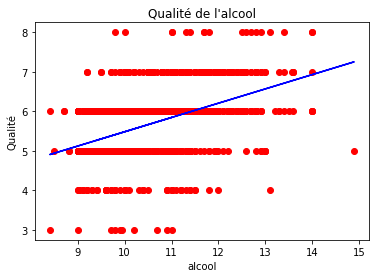

In [16]:
# Visualising the Linear Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title("Qualité de l'alcool")
plt.xlabel('alcool')
plt.ylabel('Qualité')
plt.show()

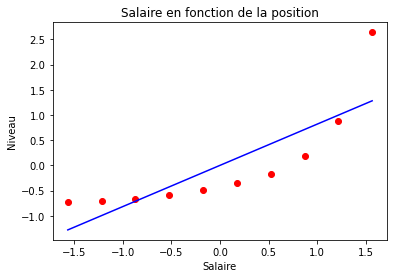

In [33]:
# Visualising the Linear Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title("Salaire en fonction de la position")
plt.xlabel('Salaire')
plt.ylabel('Niveau')
plt.show()

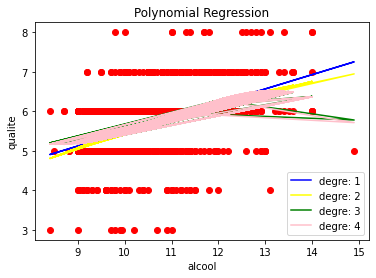

In [17]:
from sklearn.preprocessing import PolynomialFeatures
colors=['blue','yellow','green','pink','black']
plt.scatter(x, y, color = 'red')
# print(X)
# print(y)
plt.title('Polynomial Regression')
plt.xlabel('alcool')
plt.ylabel('qualite')
for i in range(1,5):

    poly_reg = PolynomialFeatures(degree = i)
    x_poly = poly_reg.fit_transform(x)
    poly_reg.fit(x_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(x_poly, y)
    
    plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = colors[i-1],label='degre: %s' %i)
    
plt.legend()    
plt.show()

In [34]:
mse = mean_squared_error(y_test, y_pred_test)
mse

5.11048629132908

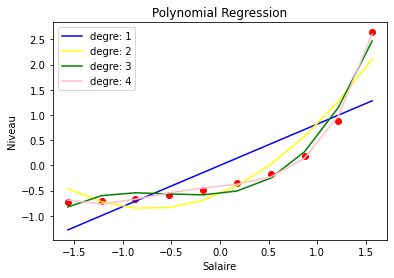

In [35]:
from sklearn.preprocessing import PolynomialFeatures
colors=['blue','yellow','green','pink','black']
plt.scatter(x, y, color = 'red')
# print(X)
# print(y)
plt.title('Polynomial Regression')
plt.xlabel('Salaire')
plt.ylabel('Niveau')
for i in range(1,5):

    poly_reg = PolynomialFeatures(degree = i)
    x_poly = poly_reg.fit_transform(x)
    poly_reg.fit(x_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(x_poly, y)
    
    plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = colors[i-1],label='degre: %s' %i)
    
plt.legend()    
plt.show()